In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load cleaned dataset
file_path = '../aditi/bigmart_data.csv'
df = pd.read_csv(file_path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


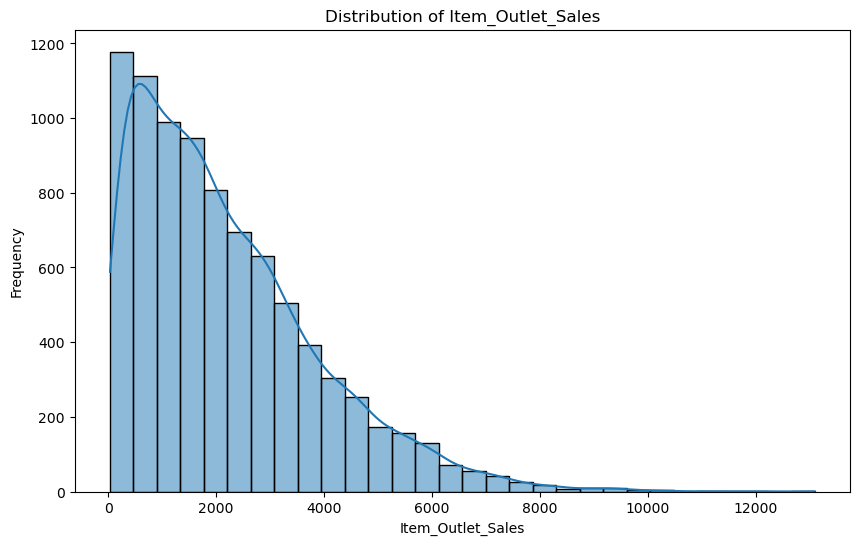

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [6]:
#Creating a new feature 'Years_Since_Established'
current_year = pd.to_datetime('today').year
df['Years_Since_Established'] = current_year - df['Outlet_Establishment_Year']


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Years_Since_Established        int64
dtype: object

In [8]:
# Apply Label Encoding to 'Item_Identifier'
le_item_identifier = LabelEncoder()
df['Item_Identifier'] = le_item_identifier.fit_transform(df['Item_Identifier'])


In [9]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
Years_Since_Established        int64
dtype: object

In [10]:
df.fillna(df.mean(), inplace=True)


In [11]:
# Split the data into training and testing sets
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train a Machine Learning Model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
#Make Predictions
y_pred = model.predict(X_test)

In [14]:
# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 1174120.009795352
R-squared Score: 0.5680158423315992


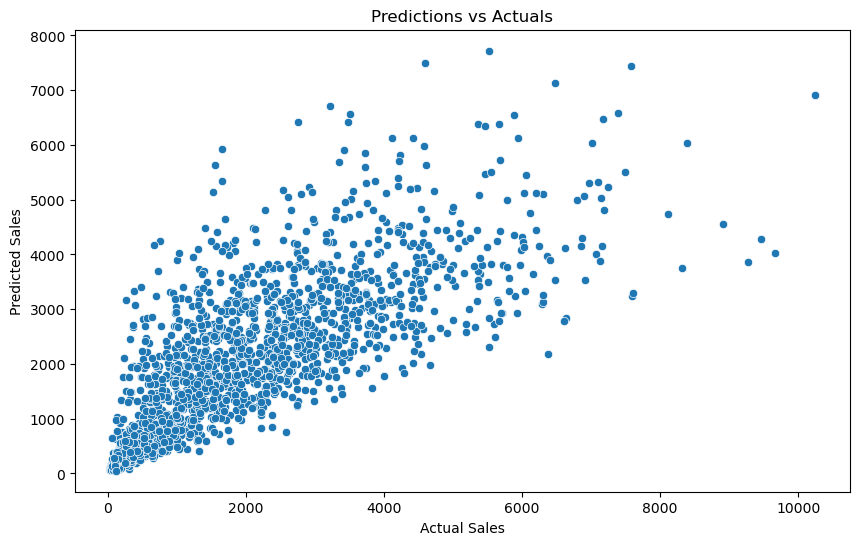

In [15]:
#Visualize Predictions vs Actuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actuals')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

# Summary: Sales Prediction with Machine Learning in Python

Sales prediction is a critical aspect for businesses, involving the forecasting of product purchases considering factors like advertising expenditure, audience segmentation, and advertising platform selection. Data scientists play a crucial role in utilizing machine learning techniques, such as Python-based analysis, to make informed decisions on advertising costs. This enables businesses to optimize strategies and maximize sales potential.

# Key Steps:


## Data Cleaning:

Cleaned the sales dataset, handling missing values and encoding categorical variables.

## Exploratory Data Analysis (EDA):

Visualized the distribution of the target variable 'Item_Outlet_Sales'.
Explored the relationship between actual and predicted values on the training set.

## Machine Learning Model:

Utilized a RandomForestRegressor for sales prediction.
Trained the model on the cleaned dataset.
Made predictions on the training set and visualized the actual vs predicted values.

## Label Encoding:

Applied Label Encoding to transform categorical variables into numerical format.
Ensured consistency in Label Encoding for categorical columns during both training and testing.

## Visualization Highlights:

Histogram to visualize the distribution of 'Item_Outlet_Sales'.
Scatter plot to visualize the relationship between actual and predicted values on the training set.